In [1]:
from utils import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = sns.load_dataset("iris")
iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
iris2 = pd.melt(iris, "species", var_name="measurement")
iris2

,species,measurement,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,petal_width,1.9
597,virginica,petal_width,2.0
598,virginica,petal_width,2.3


In [7]:
load_file ='/home/ubuntu/bucket/pathomix/results/simulations/stage0_v3.csv'
df = pd.read_csv(load_file)

In [10]:
# add feature: difference in sensitifity
# sens_training: sensitifity determind on "small" randomly drawn training sample
# 'sens': sensitifity on unknown "true" distribution (corresponds to probablity to cases after training is finished)
df['sens_diff'] = df['sens_training'] - df['sens']

,Unnamed: 0,uuid_gen,uuid_sample,theo_auc,train_auc,sample_size,prevalence,mu_normal,mu_mutation,std_normal,std_mutation,number_of_mutations,sens_training,sens,spez,ppv,npv,fnr
0,0,a7e089727af44e33882f2c080309cb2a,e7c6b46252a145e888fcc1b6dc96fbc0,0.635072,0.224490,50,0.01,-0.903794,-0.560166,0.848538,0.528765,1,1.0,0.9922,0.1392,0.535456,0.946939,0.0078
1,1,ba0f168a933b455d8c345c159b09639f,d5864c85a65544978ae7125db235e05f,0.690367,0.775510,50,0.01,0.464643,1.576993,1.396407,1.812286,1,1.0,0.9853,0.0218,0.501808,0.597260,0.0147
2,2,7b1bd6df185c406fa7365cfed2eb1206,d9f48486440a4e4ab6fdbb53c4ed224b,0.717474,0.142857,50,0.01,-0.147141,1.060276,0.387285,2.104556,1,1.0,0.8441,0.0124,0.460829,0.073678,0.1559
3,3,1569826e4e7742098139b645ede1c314,af0af0d2815c42159f7a9a532444ac88,0.727082,0.428571,50,0.01,0.052282,0.709584,1.015136,0.412574,1,1.0,1.0000,0.0144,0.503626,1.000000,0.0000
4,4,816a6e9cff5e45d195197a724436f5dd,350435dfba6646b884ddca72c8582f7b,0.751977,0.734694,50,0.01,-0.559305,-0.160164,0.555139,0.209749,1,1.0,1.0000,0.0268,0.506791,1.000000,0.0000


In [5]:
df[df.threshold_training==1].sens

AttributeError: 'DataFrame' object has no attribute 'threshold_training'

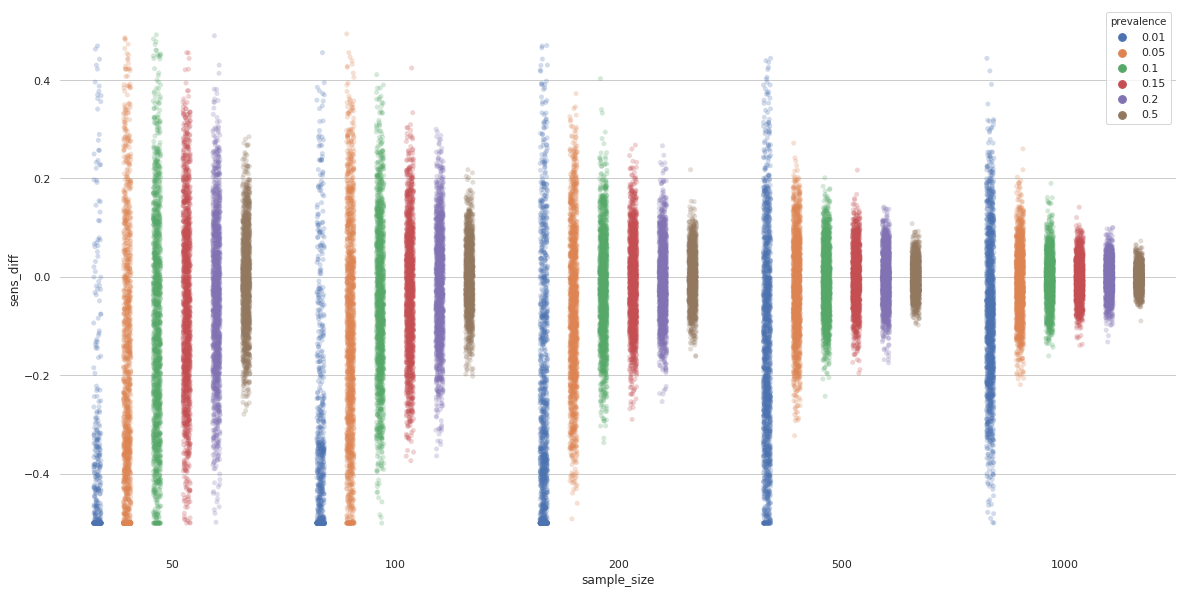

In [51]:
# reduce number of generators for the sake of visualization
num_gen_for_plotting = 15
df_short = df.loc[df['uuid_gen'].isin(df.uuid_gen.unique()[:num_gen_for_plotting])]
# pick which sensitivity threshold should be used
# select from sens = [1.0, 0.995, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9, 0.85, 0.8, 0.7, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01]

df_short = df_short[df_short.sens_training == 0.5]
sns.set(style="whitegrid")

# "Melt" the dataset to "long-form" or "tidy" representation
#df_m = pd.melt(df, "prevalence", value_vars=[''], var_name="measurement")

# Initialize the figure
f, ax = plt.subplots(figsize=(20, 10))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="sample_size", y="sens_diff", hue="prevalence",
              data=df_short, dodge=True, jitter=True,
              alpha=.25, zorder=1)

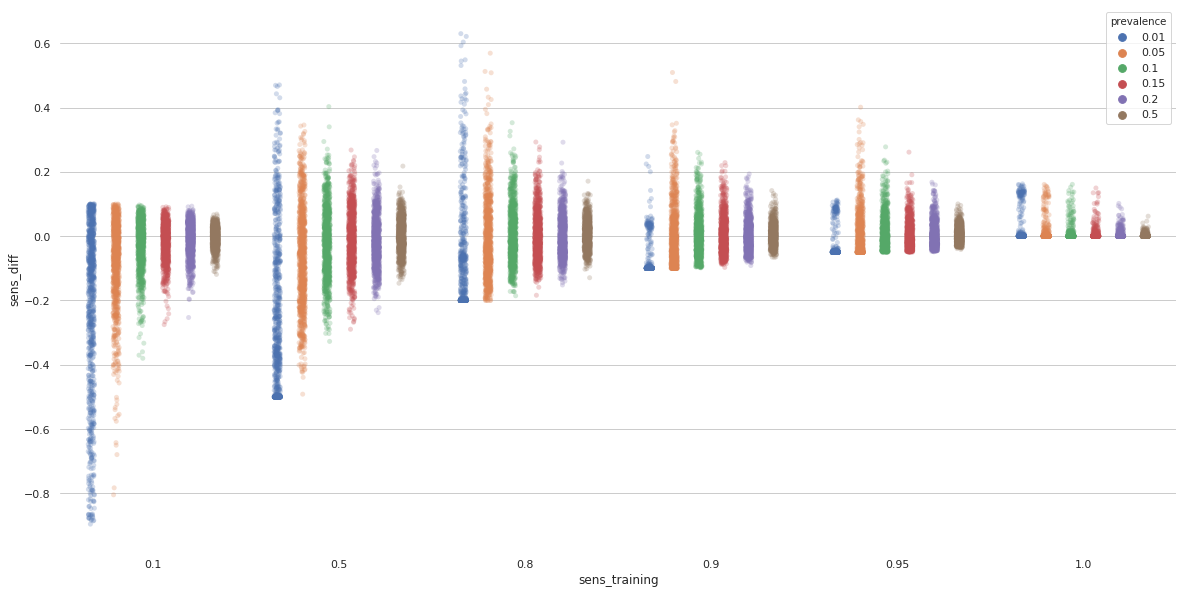

In [58]:
# reduce number of generators for the sake of visualization
num_gen_for_plotting = 10
df_short = df.loc[df['uuid_gen'].isin(df.uuid_gen.unique()[:num_gen_for_plotting])]
# pick which sensitivity threshold should be used
# select from sens = [1.0, 0.995, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9, 0.85, 0.8, 0.7, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01]

df_short = df_short.loc[df_short['sens_training'].isin([1.0, 0.95, 0.9, 0.8, 0.5, 0.1])]
df_short = df_short[df_short.sample_size == 200]
sns.set(style="whitegrid")
# Initialize the figure
f, ax = plt.subplots(figsize=(20, 10))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="sens_training", y="sens_diff", hue="prevalence",
              data=df_short, dodge=True, jitter=True,
              alpha=.25, zorder=1)

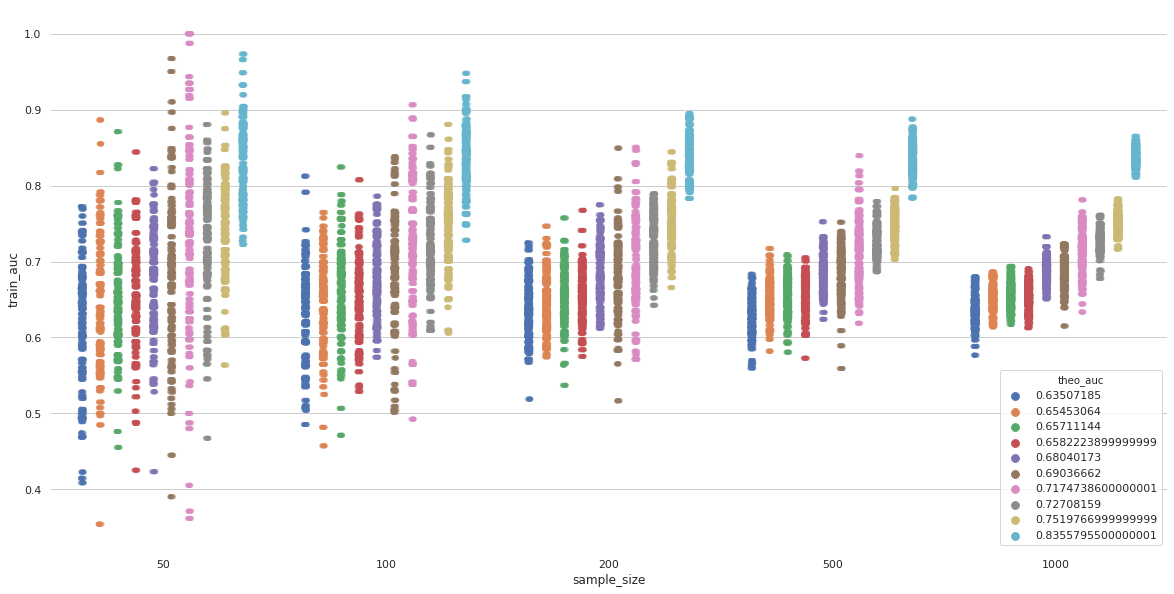

In [59]:
# reduce number of generators for the sake of visualization
num_gen_for_plotting = 10
df_short = df.loc[df['uuid_gen'].isin(df.uuid_gen.unique()[:num_gen_for_plotting])]
# pick which sensitivity threshold should be used
# select from sens = [1.0, 0.995, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9, 0.85, 0.8, 0.7, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01]

#df_short = df_short.loc[df_short['sens_training'].isin([1.0, 0.95, 0.9, 0.8, 0.5, 0.1])]
df_short = df_short[df_short.prevalence == 0.2]
sns.set(style="whitegrid")
# Initialize the figure
f, ax = plt.subplots(figsize=(20, 10))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="sample_size", y="train_auc", hue="theo_auc",
              data=df_short, dodge=True, jitter=True,
              alpha=.25, zorder=1)